# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [219]:
import numpy 
import pandas as pd
import matplotlib


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [220]:
df  = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [221]:
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4

How many years of data are logged in our dataset? 

In [222]:
# Find the number of unique years in the dataset
unique_years = df['YEAR'].nunique()

# Print the result
print(f"The dataset contains data for {unique_years} unique years.")


The dataset contains data for 33 unique years.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [223]:
# Filter the data for Michigan and Ohio
michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']

# Calculate the average of the chosen test score
michigan_avg = michigan_data['AVG_MATH_4_SCORE'].mean()
ohio_avg = ohio_data['AVG_MATH_4_SCORE'].mean()

# Print the results
print(f"Michigan's average math score (Grade 4): {michigan_avg}")
print(f"Ohio's average math score (Grade 4): {ohio_avg}")

# Determine which state has a higher average
if michigan_avg > ohio_avg:
    print("Michigan has a higher average score in Math (Grade 4) than Ohio.")
else:
    print("Ohio has a higher average score in Math (Grade 4) than Michigan.")


Michigan's average math score (Grade 4): 234.36363636363637
Ohio's average math score (Grade 4): 239.45454545454547
Ohio has a higher average score in Math (Grade 4) than Michigan.


Find the average for your chosen test across all states in 2019

In [224]:
# Filter the data for the year 2019
data_2019 = df[df['YEAR'] == 2019]

# Calculate the average of the chosen test across all states
average_math_4_2019 = data_2019['AVG_MATH_4_SCORE'].mean()

# Print the result
print(f"The average Math 4th grade score across all states in 2019 is: {average_math_4_2019}")


The average Math 4th grade score across all states in 2019 is: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [225]:
# Group the data by state and find the maximum value of the chosen test score for each state
max_math_4_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

# Print the result
print(max_math_4_by_state)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [226]:
# Create the new features

# 1. Expenditure per student
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# 2. Revenue per student
df['revenue_per_student'] = df['TOTAL_REVENUE'] / df['ENROLL']

# 3. State to Federal Revenue Ratio
df['state_federal_revenue_ratio'] = df['STATE_REVENUE'] / df['FEDERAL_REVENUE']

# Display the first few rows of the updated dataframe with the new features
df[['STATE', 'YEAR', 'expenditure_per_student', 'revenue_per_student', 'state_federal_revenue_ratio']].head()


,STATE,YEAR,expenditure_per_student,revenue_per_student,state_federal_revenue_ratio
0,ALABAMA,1992,NaN,NaN,5.454153
1,ALASKA,1992,NaN,NaN,6.749494
2,ARIZONA,1992,NaN,NaN,4.598423
3,ARKANSAS,1992,NaN,NaN,5.369209
4,CALIFORNIA,1992,NaN,NaN,7.983958


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>** 
I created features related to expenditure and revenue per student, as well as the state-to-federal revenue ratio, to explore how financial resources might influence student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

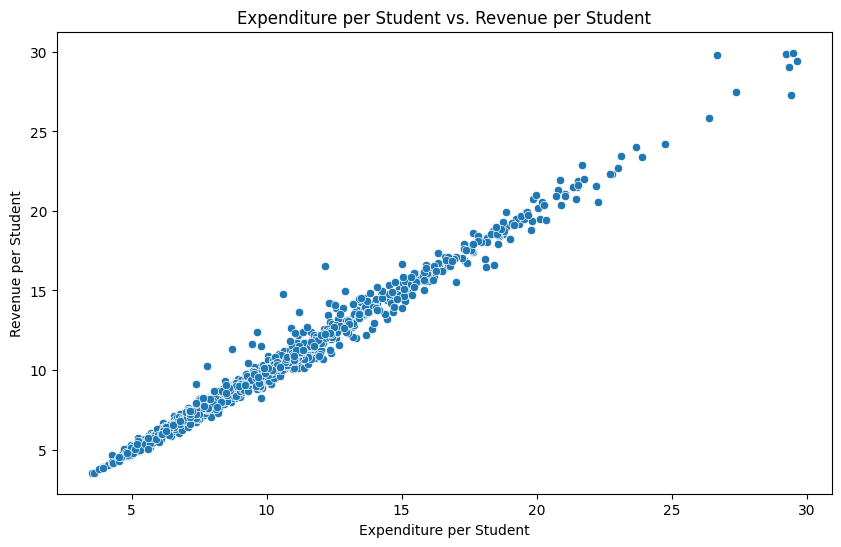

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x='expenditure_per_student', y='revenue_per_student')

# Titles and labels
plt.title('Expenditure per Student vs. Revenue per Student')
plt.xlabel('Expenditure per Student')
plt.ylabel('Revenue per Student')

plt.show()



**<CAPTION FOR VIZ 1>**

**Visualization 2**

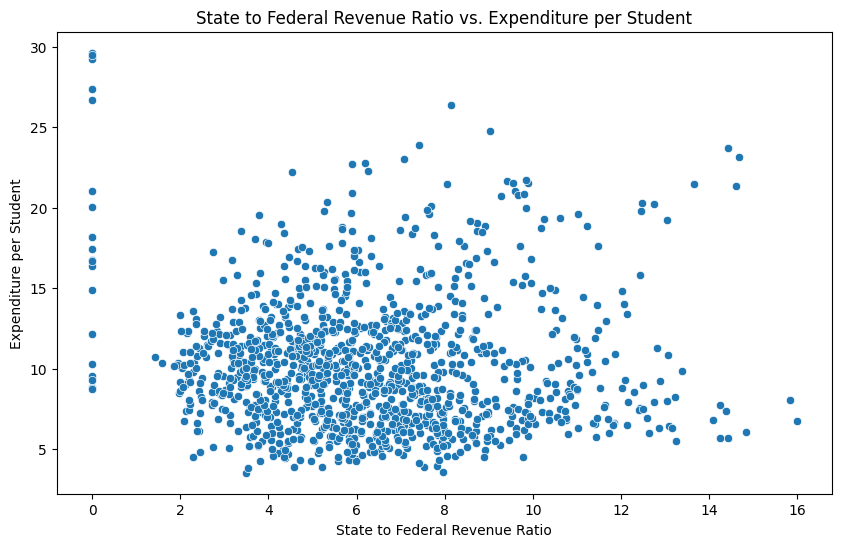

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='state_federal_revenue_ratio', y='expenditure_per_student')

# Add titles and labels
plt.title('State to Federal Revenue Ratio vs. Expenditure per Student')
plt.xlabel('State to Federal Revenue Ratio')
plt.ylabel('Expenditure per Student')

# Display the plot
plt.show()


**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

features = ['expenditure_per_student', 'revenue_per_student', 'state_federal_revenue_ratio']
target = 'TOTAL_REVENUE'


In [230]:
X = df[features]
y = df[target]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set size: X_train: (1372, 3), y_train: (1372,)
Testing set size: X_test: (343, 3), y_test: (343,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [235]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [234]:
y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

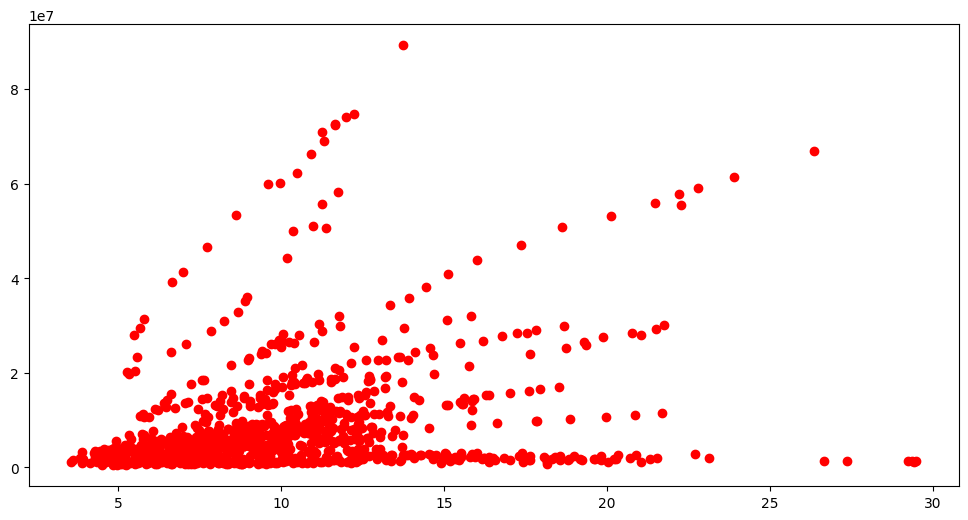

In [236]:
import matplotlib.pyplot as plt

# Specify the column name of the predictor
col_name = 'expenditure_per_student'  # Replace with your actual column name

# Create a figure
f = plt.figure(figsize=(12, 6))

# Plot true values vs. predictor
plt.scatter(X_train[col_name], y_train, color="red", label="True Training")

# Plot predicted values vs. predictor
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label="Predicted Training")

# Add labels and title
plt.legend()
plt.xlabel(col_name)
plt.ylabel('Target Variable')  # Replace with the name of your target variable
plt.title("Model Behavior On Training Set")

# Show the plot
plt.show()


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

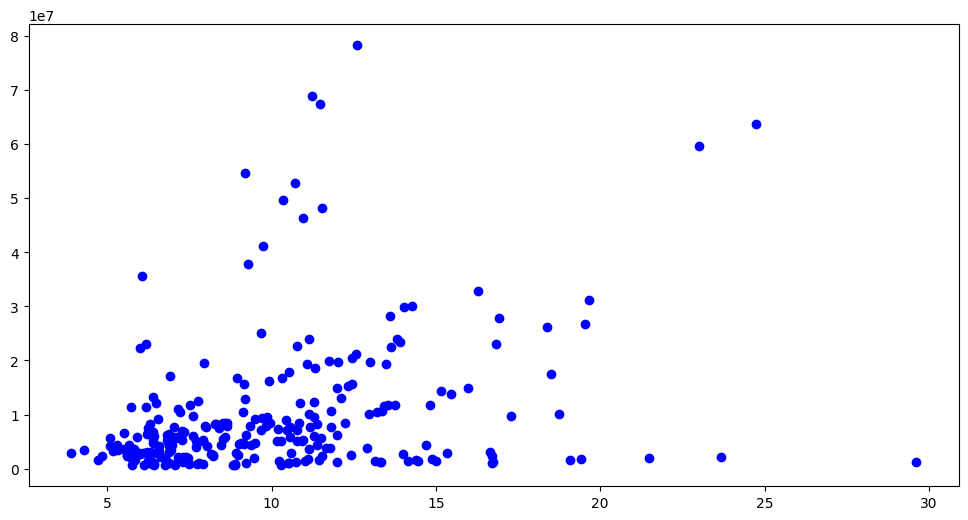

In [237]:
import matplotlib.pyplot as plt

# Specify the column name of the predictor
col_name = 'expenditure_per_student'  # Replace with your actual column name

# Create a figure
f = plt.figure(figsize=(12, 6))

# Plot true testing values vs. predictor
plt.scatter(X_test[col_name], y_test, color="blue", label="True Testing")

# Plot predicted testing values vs. predictor
plt.scatter(X_test[col_name], model.predict(X_test), color="black", label="Predicted Testing")

# Add labels and title
plt.legend()
plt.xlabel(col_name)
plt.ylabel('Target Variable')  # Replace with the name of your target variable
plt.title("Model Behavior on Testing Set")

# Show the plot
plt.show()
